In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("cleaned.csv", header=0)

In [6]:
df = df.drop(['Purpose_retraining', 'Credit History_no credits/all paid', 'Housing_rent', 'Other installment plans_stores', 'Property_unknown'], axis=1)

In [7]:
pd.options.display.max_columns = None

In [8]:
df

,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Gurantors,Present residence since,Age(Years),Number of existing credits at this bank,Job,People Maintainance,Telephone,foreign worker,Loan Quality,Gender,Marital_Status,Property_car/other,Property_life insurance/building society,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_credits paid till now,Credit History_critical/other credits,Credit History_delay in past,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs
0,0.0,6,1169,4.0,4.0,4,0,4,67,2,2.0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1.0,48,5951,0.0,2.0,2,0,2,22,1,2.0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3.0,12,2096,0.0,3.0,2,0,3,49,1,1.0,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,42,7882,0.0,3.0,2,1,4,45,1,2.0,2,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.0,24,4870,0.0,2.0,3,0,4,53,2,2.0,2,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12,1736,0.0,3.0,3,0,4,31,1,1.0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
996,0.0,30,3857,0.0,2.0,4,0,4,40,1,3.0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.0,12,804,0.0,4.0,4,0,4,38,1,2.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
998,0.0,45,1845,0.0,2.0,4,0,4,23,1,2.0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [9]:
X = df.drop('Loan Quality', axis=1)  
y = df['Loan Quality']   

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i : weights[i] for i in range(len(weights))}

In [12]:
class_weights

{0: 0.7142857142857143, 1: 1.6666666666666667}

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
numerical_cols = ['Duration(months)', 'Credit Amount', 'Age(Years)', 'Installment rate', 
                  'Present residence since', 'Number of existing credits at this bank', 
                  'People Maintainance'] 

scaler = StandardScaler()

# Fit and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [16]:
X_train

,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Gurantors,Present residence since,Age(Years),Number of existing credits at this bank,Job,People Maintainance,Telephone,foreign worker,Gender,Marital_Status,Property_car/other,Property_life insurance/building society,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_credits paid till now,Credit History_critical/other credits,Credit History_delay in past,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs
10,1.0,-0.733512,-0.713001,0.0,1.0,0.054714,0,-1.660121,-0.956361,-0.724565,2.0,-0.434114,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
82,3.0,-0.231598,-0.610869,1.0,2.0,0.054714,0,1.076342,-1.047717,-0.724565,1.0,-0.434114,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
827,3.0,-0.231598,0.360687,0.0,2.0,-0.835976,0,-0.747967,0.048549,1.074000,2.0,2.303542,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
410,1.0,0.270317,-0.461601,0.0,4.0,0.945404,0,1.076342,-1.413139,-0.724565,2.0,-0.434114,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
48,3.0,-0.817165,1.506577,0.0,2.0,-1.726666,0,1.076342,0.322615,1.074000,1.0,-0.434114,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,3.0,1.274146,0.055415,0.0,2.0,0.945404,0,-0.747967,-0.682295,-0.724565,3.0,-0.434114,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
759,0.0,-0.733512,-0.938961,0.0,4.0,0.945404,0,0.164188,-0.042807,1.074000,2.0,-0.434114,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
298,3.0,-0.231598,-0.256590,0.0,2.0,0.054714,0,1.076342,0.688037,-0.724565,2.0,-0.434114,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
417,0.0,-0.231598,1.971592,4.0,2.0,-1.726666,0,-0.747967,-1.139072,1.074000,2.0,-0.434114,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [17]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Add class_weight if imbalance
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [18]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC/AUC

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       210
           1       0.52      0.72      0.61        90

    accuracy                           0.72       300
   macro avg       0.69      0.72      0.69       300
weighted avg       0.76      0.72      0.73       300

Confusion Matrix:
 [[151  59]
 [ 25  65]]
ROC AUC: 0.7997883597883597


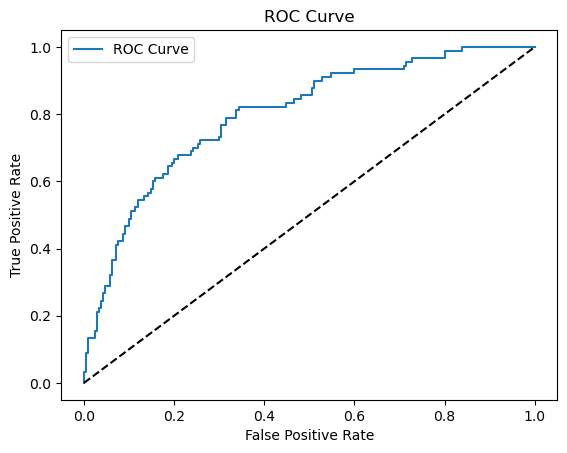

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Optional: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df['Odds_Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df.sort_values(by='Odds_Ratio', ascending=False)

,Feature,Coefficient,Odds_Ratio
13,foreign worker,1.234761,3.437556
31,Purpose_education,1.088409,2.969544
19,Other installment plans_bank,0.510390,1.665940
15,Marital_Status,0.502993,1.653663
28,Purpose_car (new),0.345441,1.412613
1,Duration(months),0.315024,1.370292
5,Installment rate,0.309972,1.363387
35,Purpose_repairs,0.290303,1.336833
2,Credit Amount,0.226744,1.254509
9,Number of existing credits at this bank,0.220344,1.246505


# Now choosing only 20 best

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [25]:
mask = selector.get_support()
selected_features = X.columns[mask]
print("Top 20 selected features:\n", selected_features.tolist())

Top 20 selected features:
 ['Checking Acc Status', 'Duration(months)', 'Credit Amount', 'Savings', 'Present employment since', 'Installment rate', 'Age(Years)', 'foreign worker', 'Gender', 'Marital_Status', 'Property_real estate', 'Other installment plans_bank', 'Other installment plans_none', 'Housing_for free', 'Housing_own', 'Credit History_all credits paid (this bank)', 'Credit History_critical/other credits', 'Purpose_car (used)', 'Purpose_education', 'Purpose_radio/television']


In [26]:
selected_features = X.columns[mask]
X_top20 = X[selected_features].copy()

print("New DataFrame with top 20 features:")
X_top20

New DataFrame with top 20 features:


,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Age(Years),foreign worker,Gender,Marital_Status,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_critical/other credits,Purpose_car (used),Purpose_education,Purpose_radio/television
0,0.0,6,1169,4.0,4.0,4,67,1,0,0,1,0,1,0,1,0,1,0,0,1
1,1.0,48,5951,0.0,2.0,2,22,1,1,1,1,0,1,0,1,0,0,0,0,1
2,3.0,12,2096,0.0,3.0,2,49,1,0,0,1,0,1,0,1,0,1,0,1,0
3,0.0,42,7882,0.0,3.0,2,45,1,0,0,0,0,1,1,0,0,0,0,0,0
4,0.0,24,4870,0.0,2.0,3,53,1,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12,1736,0.0,3.0,3,31,1,1,1,1,0,1,0,1,0,0,0,0,0
996,0.0,30,3857,0.0,2.0,4,40,1,0,1,0,0,1,0,1,0,0,1,0,0
997,3.0,12,804,0.0,4.0,4,38,1,0,0,0,0,1,0,1,0,0,0,0,1
998,0.0,45,1845,0.0,2.0,4,23,1,0,0,0,0,1,1,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

X_top20_train, X_top20_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
numerical_cols = ['Duration(months)', 'Credit Amount', 'Age(Years)'] 

scaler = StandardScaler()

# Fit and transform
X_top20[numerical_cols] = scaler.fit_transform(X_top20[numerical_cols])

In [29]:
scaler = StandardScaler()
X_top20_train[numerical_cols] = scaler.fit_transform(X_top20_train[numerical_cols])
X_top20_test[numerical_cols] = scaler.transform(X_top20_test[numerical_cols])

In [31]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Add class_weight if imbalance
model.fit(X_top20_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [32]:
y_pred = model.predict(X_top20_test)
y_proba = model.predict_proba(X_top20_test)[:, 1]  # for ROC/AUC

Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       210
           1       0.54      0.76      0.63        90

    accuracy                           0.73       300
   macro avg       0.71      0.74      0.71       300
weighted avg       0.77      0.73      0.74       300

Confusion Matrix:
 [[152  58]
 [ 22  68]]
ROC AUC: 0.7991534391534392


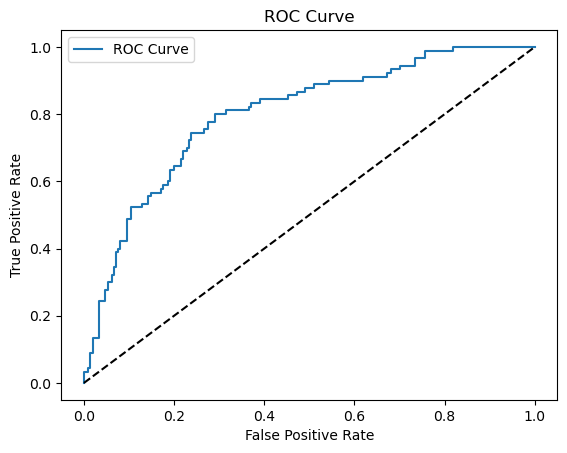

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Optional: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [35]:
coeff_df = pd.DataFrame({
    'Feature': X_top20.columns,
    'Coefficient': model.coef_[0]
})
coeff_df['Odds_Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df.sort_values(by='Odds_Ratio', ascending=False)

,Feature,Coefficient,Odds_Ratio
7,foreign worker,1.195645,3.305688
18,Purpose_education,0.922288,2.515039
11,Other installment plans_bank,0.503496,1.654496
9,Marital_Status,0.420659,1.522964
1,Duration(months),0.301465,1.351838
15,Credit History_all credits paid (this bank),0.285915,1.330979
5,Installment rate,0.259530,1.296321
2,Credit Amount,0.204118,1.226443
8,Gender,0.019521,1.019713
6,Age(Years),-0.023000,0.977262


# Optimization

<AxesSubplot:>

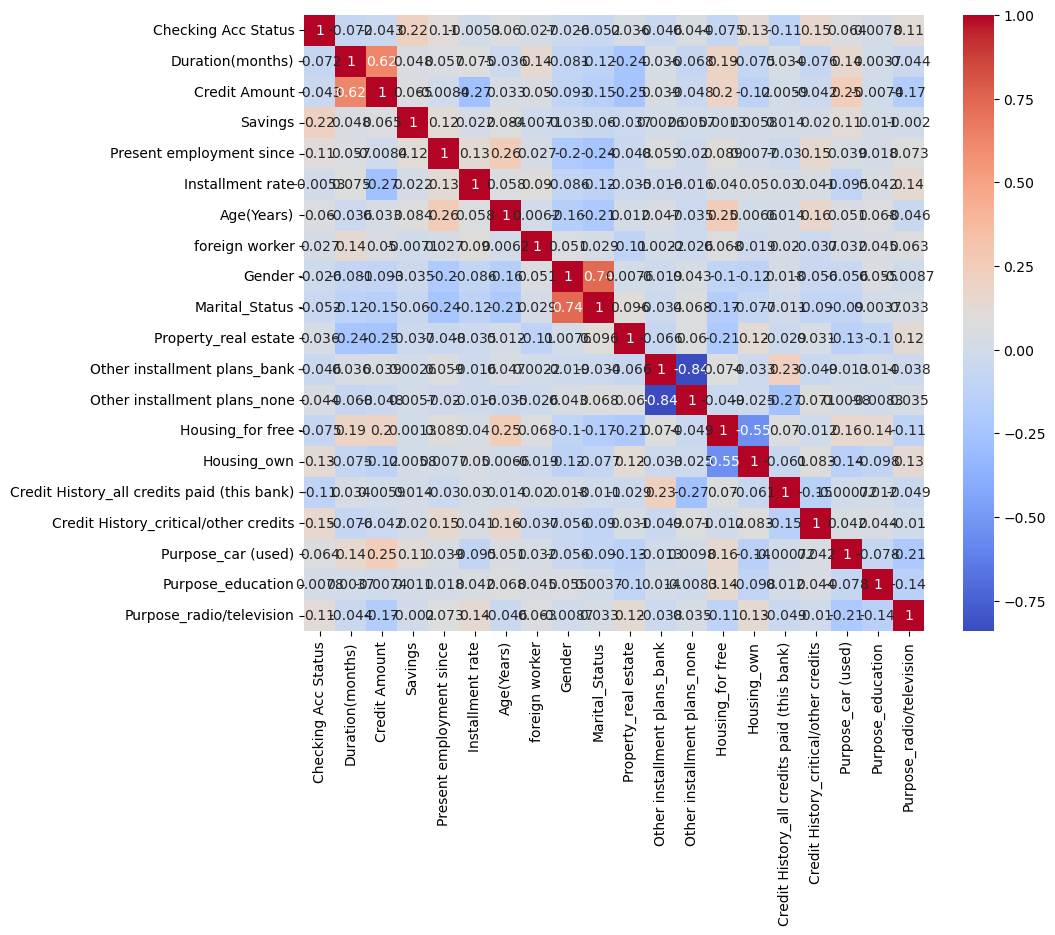

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_top20.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X.columns))]

In [39]:
vif

,Feature,VIF
0,Checking Acc Status,1.179364
1,Duration(months),2.006496
2,Credit Amount,2.427035
3,Savings,1.123130
4,Present employment since,1.249315
5,Installment rate,1.350666
6,Gurantors,1.121551
7,Present residence since,1.293110
8,Age(Years),1.332524
9,Number of existing credits at this bank,1.623247


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_top20)
vif = pd.DataFrame()
vif["Feature"] = X_top20.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X_top20.columns))]

In [47]:
vif

,Feature,VIF
0,Checking Acc Status,1.135407
1,Duration(months),1.928908
2,Credit Amount,2.164909
3,Savings,1.086637
4,Present employment since,1.178445
5,Installment rate,1.282543
6,Age(Years),1.233851
7,foreign worker,1.053105
8,Gender,2.258596
9,Marital_Status,2.396055


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear')  # or saga
model.fit(X_top20_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [49]:
y_pred = model.predict(X_top20_test)
y_proba = model.predict_proba(X_top20_test)[:, 1]  # for ROC/AUC

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       210
           1       0.65      0.50      0.57        90

    accuracy                           0.77       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

Confusion Matrix:
 [[186  24]
 [ 45  45]]
ROC AUC: 0.7936507936507937


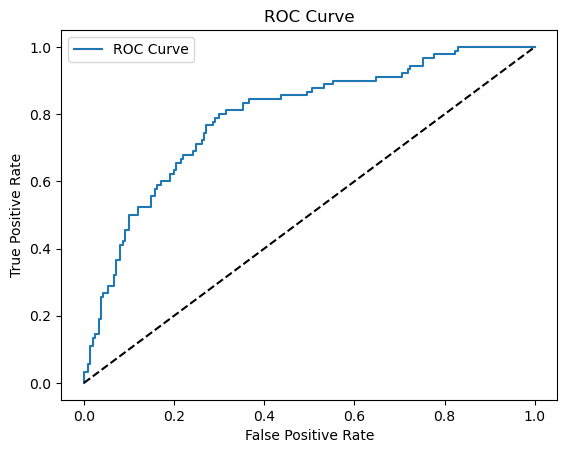

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Optional: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [51]:
coeff_df = pd.DataFrame({
    'Feature': X_top20.columns,
    'Coefficient': model.coef_[0]
})
coeff_df['Odds_Ratio'] = np.exp(coeff_df['Coefficient'])
coeff_df.sort_values(by='Odds_Ratio', ascending=False)

,Feature,Coefficient,Odds_Ratio
18,Purpose_education,0.868774,2.383987
7,foreign worker,0.744246,2.104854
9,Marital_Status,0.380724,1.463343
1,Duration(months),0.337215,1.401041
11,Other installment plans_bank,0.284348,1.328895
5,Installment rate,0.246253,1.279223
2,Credit Amount,0.152302,1.164511
15,Credit History_all credits paid (this bank),0.102419,1.107848
8,Gender,0.000000,1.000000
6,Age(Years),-0.012555,0.987524
